# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

import nltk
# nltk.download('stopwords')

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [21]:
# Add any additional import statements you need here
# To speeds up comparison in further stpes.
punctuation = set(punctuation)  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/bista/OneDrive/Desktop/Desktop/ADS 509 Applied Text Mining/Assignment 2/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment. 
# Using Cher and Robyn lyrics for this assignment. 
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Replace the void values here with in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # The five most common tokens from the above data.
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [5]:

text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Some of the beifits of using assertion statement includes detection of error in early phase of analysis, they provide opportinity to debug the code, this also facilitates to check code automatically, etc. Here, the token number, no. of unique token, charater numbers and lexical diversity provides inital code information and establishes code integrity. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:

# Read in the lyrics data
lyrics_data = defaultdict(dict)
for artist_folder in os.listdir(os.path.join(data_location, lyrics_folder)):
    artist_path = os.path.join(data_location, lyrics_folder, artist_folder)
    if os.path.isdir(artist_path):
        for song_file in os.listdir(artist_path):
            if song_file.endswith(".txt"):
                song_path = os.path.join(artist_path, song_file)
                with open(song_path, "r", encoding="utf-8") as f:
                    lyrics_data[artist_folder][song_file] = f.read()

In [7]:

# Read in the Twitter data (focusing on the descriptions data availabe in the module 1 data given in the question)
twitter_data = defaultdict(list)
for twitter_file in os.listdir(os.path.join(data_location, twitter_folder)):
    if twitter_file.endswith("_followers_data.txt"):
        artist = twitter_file.split("_")[0]  # Use the prefix as the artist's name
        with open(os.path.join(data_location, twitter_folder, twitter_file), "r", encoding="utf-8") as f:
            for line in f:
                twitter_data[artist].append(line.strip())


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:

# Define the Function to clean and tokenize text.
# This fucntion would be recalled later. 
def clean_and_tokenize(text):
    """
    Clean and tokenize the input text by:
    - Removing punctuation
    - Converting to lowercase
    - Removing stopwords
    - Splitting on whitespace
    """
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation])
    tokens = text.split()  # In this step we tokenize by splitting on whitespace.
    tokens = [token for token in tokens if token not in sw]  # This step removes stopwords.
    return tokens

In [9]:

# create your clean lyrics data here

clean_lyrics_data = {artist: {song: clean_and_tokenize(lyrics) for song, lyrics in songs.items()} 
                     for artist, songs in lyrics_data.items()}

In [10]:

# create your clean twitter data here

clean_twitter_data = {artist: [clean_and_tokenize(desc) for desc in descriptions] 
                      for artist, descriptions in twitter_data.items()}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [26]:
# Display descriptive stats for the first 10 songs from Robyn's lyrics
for i, (song, tokens) in enumerate(clean_lyrics_data['robyn'].items()):
    if i == 10:  # Limit to 10 songs
        break
    print(f"\nDescriptive stats for {song}:")
    descriptive_stats(tokens)



Descriptive stats for robyn_88days.txt:
There are 205 tokens in the data.
There are 80 unique tokens in the data.
There are 887 characters in the data.
The lexical diversity is 0.390 in the data.

Descriptive stats for robyn_aintnothing.txt:
There are 66 tokens in the data.
There are 40 unique tokens in the data.
There are 305 characters in the data.
The lexical diversity is 0.606 in the data.

Descriptive stats for robyn_anytimeyoulike.txt:
There are 119 tokens in the data.
There are 56 unique tokens in the data.
There are 578 characters in the data.
The lexical diversity is 0.471 in the data.

Descriptive stats for robyn_babyforgiveme.txt:
There are 77 tokens in the data.
There are 34 unique tokens in the data.
There are 343 characters in the data.
The lexical diversity is 0.442 in the data.

Descriptive stats for robyn_beach2k20.txt:
There are 174 tokens in the data.
There are 33 unique tokens in the data.
There are 713 characters in the data.
The lexical diversity is 0.190 in the 

In [29]:
# Display descriptive stats for Robyn's lyrics
#for song, tokens in clean_lyrics_data['robyn'].items():
#    print(f"\nDescriptive stats for {song}:")
#    descriptive_stats(tokens)

In [27]:
# Display descriptive stats for the first 10 songs from Cher's lyrics
for i, (song, tokens) in enumerate(clean_lyrics_data['cher'].items()):
    if i == 10:  # Limiting to 10 songs
        break
    print(f"\nDescriptive stats for {song}:")
    descriptive_stats(tokens)



Descriptive stats for cher_88degrees.txt:
There are 182 tokens in the data.
There are 82 unique tokens in the data.
There are 831 characters in the data.
The lexical diversity is 0.451 in the data.

Descriptive stats for cher_adifferentkindoflovesong.txt:
There are 137 tokens in the data.
There are 41 unique tokens in the data.
There are 691 characters in the data.
The lexical diversity is 0.299 in the data.

Descriptive stats for cher_afterall.txt:
There are 120 tokens in the data.
There are 59 unique tokens in the data.
There are 603 characters in the data.
The lexical diversity is 0.492 in the data.

Descriptive stats for cher_again.txt:
There are 34 tokens in the data.
There are 28 unique tokens in the data.
There are 143 characters in the data.
The lexical diversity is 0.824 in the data.

Descriptive stats for cher_alfie.txt:
There are 67 tokens in the data.
There are 46 unique tokens in the data.
There are 339 characters in the data.
The lexical diversity is 0.687 in the data.



In [28]:
# Display descriptive stats for Cher's lyrics
#for song, tokens in clean_lyrics_data['cher'].items():
#    print(f"\nDescriptive stats for {song}:")
#    descriptive_stats(tokens)


In [13]:
# We are limiting to first 25 as considering complete takes long time. 

# Limit to the first 25 descriptions for debugging
for desc_tokens in clean_twitter_data['cher'][:25]:
    descriptive_stats(desc_tokens)


There are 7 tokens in the data.
There are 7 unique tokens in the data.
There are 61 characters in the data.
The lexical diversity is 1.000 in the data.
There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 33 characters in the data.
The lexical diversity is 1.000 in the data.
There are 12 tokens in the data.
There are 12 unique tokens in the data.
There are 75 characters in the data.
The lexical diversity is 1.000 in the data.
There are 8 tokens in the data.
There are 8 unique tokens in the data.
There are 79 characters in the data.
The lexical diversity is 1.000 in the data.
There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 32 characters in the data.
The lexical diversity is 1.000 in the data.
There are 24 tokens in the data.
There are 22 unique tokens in the data.
There are 163 characters in the data.
The lexical diversity is 0.917 in the data.
There are 6 tokens in the data.
There are 6 unique tokens in the data.
There are 44

In [14]:
# We are limiting to first 25 as considering complete takes long time. 

# Limit to the first 25 descriptions for Robyn for debugging
for desc_tokens in clean_twitter_data['robynkonichiwa'][:25]:
    descriptive_stats(desc_tokens)


There are 7 tokens in the data.
There are 7 unique tokens in the data.
There are 61 characters in the data.
The lexical diversity is 1.000 in the data.
There are 15 tokens in the data.
There are 15 unique tokens in the data.
There are 130 characters in the data.
The lexical diversity is 1.000 in the data.
There are 21 tokens in the data.
There are 21 unique tokens in the data.
There are 130 characters in the data.
The lexical diversity is 1.000 in the data.
There are 30 tokens in the data.
There are 28 unique tokens in the data.
There are 143 characters in the data.
The lexical diversity is 0.933 in the data.
There are 27 tokens in the data.
There are 26 unique tokens in the data.
There are 152 characters in the data.
The lexical diversity is 0.963 in the data.
There are 18 tokens in the data.
There are 17 unique tokens in the data.
There are 132 characters in the data.
The lexical diversity is 0.944 in the data.
There are 5 tokens in the data.
There are 5 unique tokens in the data.
Th

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If there were left stopword, top 5 words would be definitely be different. In fact the top 5 word would mostly include common, general words such as "and", "of", etc. These word would are genrally used words and does not contain meanings. In this way, we would miss the peculiar vocabulary words of the artist lyrics or twitter descriptions. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: After some research, I found Cher had longer career, wide range of songs and Robyn has modern electronic style of composing songs. I thought Cher would have greater lexical diversity. As, I observed the anaysis result, this assumed were concurred on some songs and rejected on some other songs. I conluded lexical diversity fluctuates significnatly between the songs of both artists. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [15]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [16]:

# In this step we use helper function to extract emojis from a string
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# Counting the most common emojis by artist
common_emojis_by_artist = defaultdict(Counter)

for artist, descriptions in twitter_data.items():
    for desc in descriptions:
        emojis = extract_emojis(desc)
        common_emojis_by_artist[artist].update(emojis)

# Now, the ten most common emojis for each artist
for artist, emoji_counter in common_emojis_by_artist.items():
    print(f"Most common emojis for {artist}:")
    print(emoji_counter.most_common(10))


Most common emojis for cher:
[('❤', 94506), ('🌈', 66291), ('♥', 48059), ('🏳', 47174), ('✨', 45846), ('🌊', 31234), ('💙', 31050), ('🏻', 25195), ('✌', 21963), ('💜', 21571)]
Most common emojis for robynkonichiwa:
[('🌈', 6086), ('❤', 5635), ('🏳', 4641), ('♥', 4249), ('✨', 3217), ('🏻', 1751), ('✌', 1495), ('♀', 1347), ('🏼', 1340), ('💙', 1200)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [17]:

# In this step we are using helper function to extract hashtags from a string
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

# Counting the most common hashtags by artist
common_hashtags_by_artist = defaultdict(Counter)

for artist, descriptions in twitter_data.items():
    for desc in descriptions:
        hashtags = extract_hashtags(desc)
        common_hashtags_by_artist[artist].update(hashtags)

# The ten most common hashtags for each artist
for artist, hashtag_counter in common_hashtags_by_artist.items():
    print(f"Most common hashtags for {artist}:")
    print(hashtag_counter.most_common(10))


Most common hashtags for cher:
[('#BLM', 10100), ('#Resist', 6161), ('#BlackLivesMatter', 4888), ('#resist', 3860), ('#FBR', 3330), ('#1', 3111), ('#TheResistance', 3044), ('#blacklivesmatter', 2738), ('#Resistance', 1953), ('#RESIST', 1878)]
Most common hashtags for robynkonichiwa:
[('#BlackLivesMatter', 356), ('#BLM', 345), ('#1', 228), ('#blacklivesmatter', 222), ('#music', 175), ('#Music', 114), ('#EDM', 87), ('#LGBTQ', 76), ('#blm', 60), ('#TeamFollowBack', 59)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [18]:

# Extracting the first line (song title) from each song's lyrics
song_title_words_by_artist = defaultdict(Counter)

for artist, songs in lyrics_data.items():
    for song, lyrics in songs.items():
        # Extracting first line (title) and tokenize it
        title = lyrics.split('\n', 1)[0]  
        title_tokens = clean_and_tokenize(title)
        song_title_words_by_artist[artist].update(title_tokens)

# Displaying the five most common words in song titles for each artist
for artist, title_counter in song_title_words_by_artist.items():
    print(f"Most common words in song titles for {artist}:")
    print(title_counter.most_common(5))


Most common words in song titles for cher:
[('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]
Most common words in song titles for robyn:
[('love', 6), ('dont', 4), ('u', 4), ('thing', 3), ('girl', 3)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


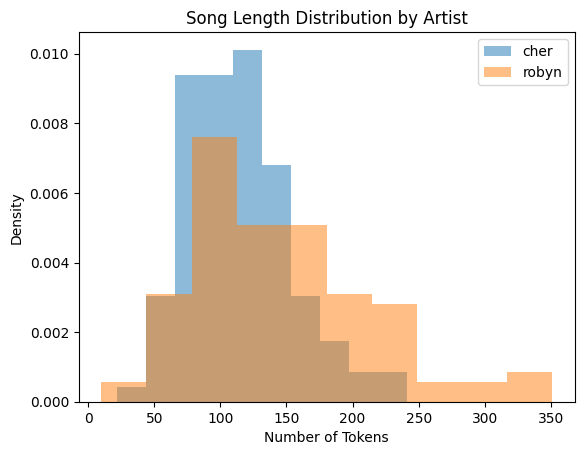

In [20]:
# Calculateing song lengths (number of tokens) by artist
song_lengths = []

for artist, songs in clean_lyrics_data.items():
    for song, tokens in songs.items():
        song_lengths.append({'artist': artist, 'length': len(tokens)})

# Createing a DataFrame for easier plotting
df_song_lengths = pd.DataFrame(song_lengths)

# Ploting histograms for each artist's song lengths
df_song_lengths.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)
plt.title("Song Length Distribution by Artist")
plt.xlabel("Number of Tokens")
plt.ylabel("Density")
plt.show()


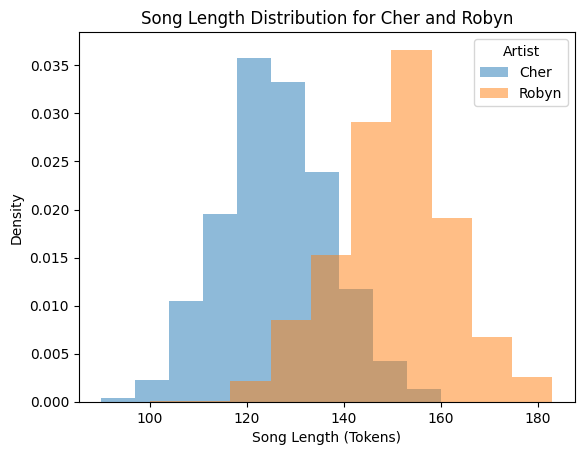

In [22]:
# Simulated Poisson Distribution: Here we are using a Poisson distribution to simulate song lengths for two different artists.

# Define num_replicates
num_replicates = 1000

# Creating DataFrame with Poisson-distributed song lengths for Cher and Robyn
df = pd.DataFrame({
    "artist" : ['Cher'] * num_replicates + ['Robyn'] * num_replicates,
    "length" : np.concatenate((np.random.poisson(125, num_replicates), np.random.poisson(150, num_replicates)))
})

# Plot histograms
df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

# Add labels and title
plt.xlabel('Song Length (Tokens)')
plt.ylabel('Density')
plt.title('Song Length Distribution for Cher and Robyn')
plt.legend(title="Artist")
plt.show()


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: This regular expression match on one or more whitespaces which is inlcusive of the spaces, tabs, newline characters, etc. + means pattern will match one or more occuracne of precesing whitespace character class of \s. 


In [27]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [23]:
# Regular expression to collapse multiple whitespace characters
collapse_whitespace = re.compile(r'\s+')

# Function to clean, collapse whitespace, and tokenize lyrics
def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric.strip())]



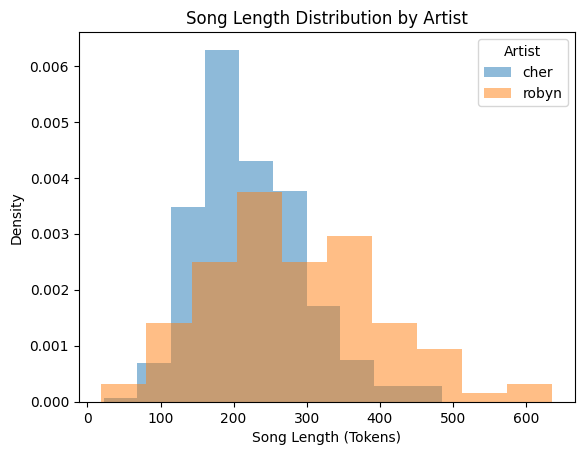

In [25]:
# Comparision of song by artist after collapsing multiple whitespace characters

# Regular expression to collapse multiple whitespace characters
collapse_whitespace = re.compile(r'\s+')

# Function to clean, collapse whitespace, and tokenize lyrics
def tokenize_lyrics(lyric):
    """Strip and split on whitespace"""
    return [item.lower() for item in collapse_whitespace.split(lyric.strip())]

data_location = "/users/bista/OneDrive/Desktop/Desktop/ADS 509 Applied Text Mining/Assignment 2/"
lyrics_folder = "lyrics/"

# Initializing data structures
lyrics_data = {}

# Loop through artists and read their lyrics
for artist in ['cher', 'robyn']:
    artist_path = os.path.join(data_location, lyrics_folder, artist)
    lyrics_data[artist] = []
    
    # Read all songs for the artist
    for song_file in os.listdir(artist_path):
        if song_file.endswith(".txt"):
            song_path = os.path.join(artist_path, song_file)
            with open(song_path, "r", encoding="utf-8") as f:
                lyrics_data[artist].append(f.read())

# Clean and tokenize the lyrics, and calculate the lengths
song_lengths = []
for artist, songs in lyrics_data.items():
    for song in songs:
        tokens = tokenize_lyrics(song)
        song_lengths.append({'artist': artist, 'length': len(tokens)})

# Create a DataFrame for easier plotting
df_song_lengths = pd.DataFrame(song_lengths)

# Plot histograms for each artist's song lengths
df_song_lengths.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)

# Add labels and title
plt.xlabel('Song Length (Tokens)')
plt.ylabel('Density')
plt.title('Song Length Distribution by Artist')
plt.legend(title="Artist")
plt.show()
